<a href="https://colab.research.google.com/github/abasilio91/aulas_ANN_ufu/blob/main/projects/ann_article_settling_reproduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

original article: https://www.sciencedirect.com/science/article/abs/pii/S0301751612000397

In [ ]:
def normalize(data):

  data_n = []
  for item in data:
    value = 2*(item-min(data))/(max(data)-min(data))-1
    data_n.append(value)
  
  return data_n

def undo_norm(data, v_min, v_max):
  
  data_n = []

  for item in data:
    value = (item+1)/2 *(v_max - v_min) + v_min
    data_n.append(value)

  return data_n

In [ ]:
url = 'https://raw.githubusercontent.com/abasilio91/aulas_ANN_ufu/main/projects/data_ann_article_settling.txt'
originais = pd.read_csv(url,sep=' ')
originais

,k,n,dp,ps,p,V,Re,Cd
0,0.2648,0.7529,0.0015,2260,1000.000,0.0119,0.1125,174.572
1,0.2648,0.7529,0.0021,2727,1000.000,0.0361,0.5678,35.534
2,0.2648,0.7529,0.0023,2449,1000.000,0.0409,0.7234,26.059
3,0.2648,0.7529,0.0030,2609,1000.000,0.0664,1.6292,14.463
4,0.2648,0.7529,0.0035,2572,1000.000,0.0802,2.2735,11.029
...,...,...,...,...,...,...,...,...
83,0.0849,0.9099,0.0032,2506,999.835,0.0820,4.0910,9.260
84,0.0849,0.9099,0.0022,2668,999.922,0.0493,1.7180,20.110
85,0.0849,0.9099,0.0012,2314,1000.004,0.0164,0.2978,77.960
86,0.0849,0.9099,0.0026,11444,999.267,0.3286,15.7112,3.330


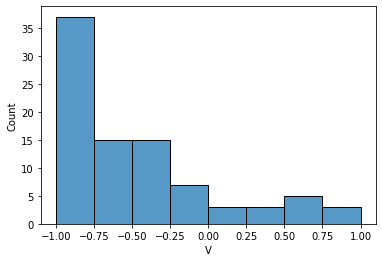

In [ ]:
sns.histplot(data=dados_norm, x='V')

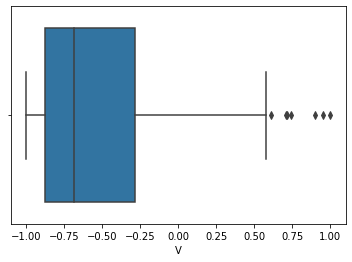

In [ ]:
sns.boxplot(data=dados_norm, x='V')

In [ ]:
dados = {}

for col in originais.columns:
    series = originais[col]
    series_normalized = normalize(series)
    dados[f'{col}'] = series_normalized
    
dados_norm = pd.DataFrame(dados).drop(['Re','Cd'],axis=1)
dados_norm

,k,n,dp,ps,p,V
0,-0.973266,0.473471,-0.875000,-0.787814,-0.912216,-0.992375
1,-0.973266,0.473471,-0.767857,-0.696905,-0.912216,-0.953115
2,-0.973266,0.473471,-0.732143,-0.751022,-0.912216,-0.945328
3,-0.973266,0.473471,-0.607143,-0.719875,-0.912216,-0.903958
4,-0.973266,0.473471,-0.517857,-0.727078,-0.912216,-0.881570
...,...,...,...,...,...,...
83,-0.991497,0.808012,-0.571429,-0.739926,-0.913540,-0.878650
84,-0.991497,0.808012,-0.750000,-0.708390,-0.912842,-0.931700
85,-0.991497,0.808012,-0.928571,-0.777302,-0.912184,-0.985075
86,-0.991497,0.808012,-0.678571,1.000000,-0.918096,-0.478585


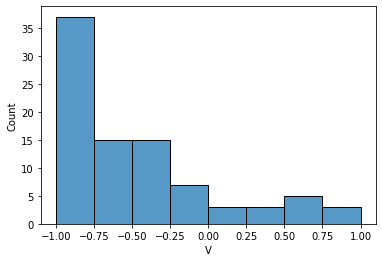

In [ ]:
sns.histplot(data=dados_norm, x='V')

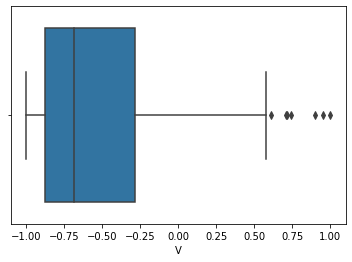

In [ ]:
sns.boxplot(data=dados_norm, x='V')

In [ ]:
X = dados_norm.drop('V',axis=1)
y = dados_norm['V']

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=69, shuffle=True)
split_data = {'x_train':x_train, 'y_train':y_train, 'x_test':x_test, 'y_test':y_test}

In [ ]:
test_data = pd.concat([x_test,y_test], axis=1)
test_data

,k,n,dp,ps,p,V
8,-0.996524,0.728106,-0.732143,-0.751022,-0.912216,-0.830143
36,-0.994821,0.424675,-0.607143,-0.941600,-0.912216,-0.892602
55,-0.334229,-0.961219,-0.250000,0.319642,-0.748520,-0.022064
62,-0.334229,-0.961219,0.642857,0.289858,-0.748520,0.578196
18,-0.982974,0.200938,-0.607143,-0.741094,-0.920237,-0.814893
59,-0.502508,-0.688685,0.642857,0.289858,-0.912216,0.707982
20,-0.982974,0.200938,-0.250000,-0.741094,-0.920237,-0.602206
78,-0.991335,0.703814,-0.571429,-0.739926,-0.915489,-0.844419
39,-0.995419,0.424675,-0.089286,-1.000000,-0.912216,-0.847339
80,-0.991335,0.703814,-0.928571,-0.777302,-0.912345,-0.975178


In [ ]:
model = BayesianRidge()
model.fit(x_train,y_train)

predict = model.predict(x_test)
y_test = np.array(y_test.tolist())

model_results = {'V real':y_test, 'V predict_bayesian':predict}
model_results = pd.DataFrame(model_results)

model2 = MLPRegressor(shuffle=True, solver='adam', hidden_layer_sizes=12, activation='tanh', max_iter=5000).fit(x_train, y_train)
predict = model2.predict(x_test)

model_results['V predict_mlp'] = predict
model_results = pd.DataFrame(model_results)
model_results

,V real,V predict_bayesian,V predict_mlp
0,-0.830143,-0.835439,-0.900628
1,-0.892602,-0.784803,-0.799094
2,-0.022064,-0.322209,-0.049037
3,0.578196,0.210178,0.346434
4,-0.814893,-0.720898,-0.631358
5,0.707982,0.241961,0.329327
6,-0.602206,-0.505004,-0.455063
7,-0.844419,-0.734711,-0.813319
8,-0.847339,-0.486027,-0.569376
9,-0.975178,-0.960069,-0.993634


In [ ]:
dados_retorno = {}
v_max = originais['V'].max()
v_min = originais['V'].min()

for col in model_results.columns:
    series = model_results[col]
    series_undo = undo_norm(series, v_min, v_max)
    dados_retorno[f'{col}'] = series_undo

model_results_undone = pd.DataFrame(dados_retorno)
model_results_undone

,V real,V predict_bayesian,V predict_mlp
0,0.1119,0.108636,0.068453
1,0.0734,0.139847,0.131039
2,0.6100,0.424991,0.593374
3,0.9800,0.753153,0.837142
4,0.1213,0.179238,0.234431
5,1.0600,0.772745,0.826597
6,0.2524,0.312316,0.343099
7,0.1031,0.170724,0.122270
8,0.1013,0.324013,0.272637
9,0.0225,0.031813,0.011124


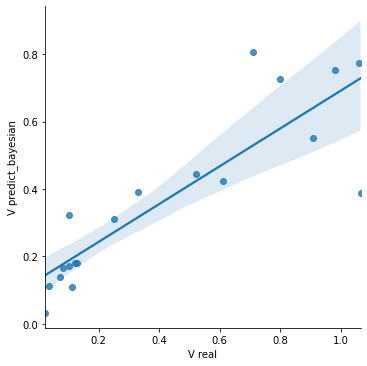

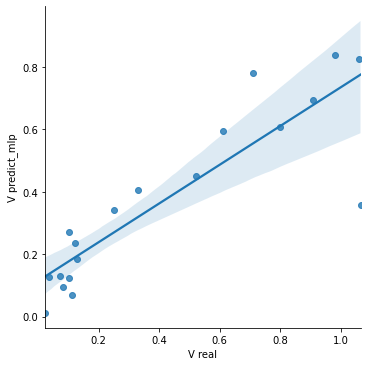

In [ ]:
sns.lmplot(x='V real', y='V predict_bayesian', data=model_results_undone)
sns.lmplot(x='V real', y='V predict_mlp', data=model_results_undone)

In [ ]:
pipe = Pipeline([
                 ('model', BayesianRidge())
])

pipe.get_params()

In [ ]:
model_bayes = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__n_iter': [100,500,1000],
        'model__alpha_1': [1e-5,1e-6,1e-7],
        'model__alpha_2': [1e-5,1e-6,1e-7],
        'model__lambda_1': [1e-5,1e-6,1e-7],
        'model__lambda_2': [1e-5,1e-6,1e-7]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_bayes.fit(X,y)
df_results_bayes = pd.DataFrame(model_bayes.cv_results_)
df_results_bayes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.002958,0.000842,0.002160,0.000785,1e-05,1e-05,1e-05,1e-05,100,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872559,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,7,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,145
1,0.003006,0.000959,0.001668,0.000295,1e-05,1e-05,1e-05,1e-05,500,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872559,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,7,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,145
2,0.002543,0.000311,0.001516,0.000226,1e-05,1e-05,1e-05,1e-05,1000,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872559,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,7,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,145
3,0.002380,0.000371,0.001490,0.000310,1e-05,1e-05,1e-05,1e-06,100,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-3.923121,-5.788250,-0.335462,0.704780,-4.627803,-2.872553,-3.265527,0.578737,-0.433284,-0.271663,-2.023415,2.224638,22,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,226
4,0.002165,0.000182,0.001344,0.000119,1e-05,1e-05,1e-05,1e-06,500,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-3.923121,-5.788250,-0.335462,0.704780,-4.627803,-2.872553,-3.265527,0.578737,-0.433284,-0.271663,-2.023415,2.224638,22,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.002502,0.000418,0.001616,0.000339,1e-07,1e-07,1e-07,1e-06,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923117,-5.788252,-0.335462,0.704780,-4.627801,-2.872555,-3.265527,0.578737,-0.433286,-0.271665,-2.023415,2.224638,226,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,73
239,0.002225,0.000154,0.001373,0.000122,1e-07,1e-07,1e-07,1e-06,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923117,-5.788252,-0.335462,0.704780,-4.627801,-2.872555,-3.265527,0.578737,-0.433286,-0.271665,-2.023415,2.224638,226,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,73
240,0.002392,0.000387,0.001445,0.000153,1e-07,1e-07,1e-07,1e-07,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923118,-5.788251,-0.335462,0.704780,-4.627802,-2.872555,-3.265527,0.578737,-0.433285,-0.271664,-2.023415,2.224638,232,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,109
241,0.002214,0.000228,0.001379,0.000107,1e-07,1e-07,1e-07,1e-07,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923118,-5.788251,-0.335462,0.704780,-4.627802,-2.872555,-3.265527,0.578737,-0.433285,-0.271664,-2.023415,2.224638,232,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,109


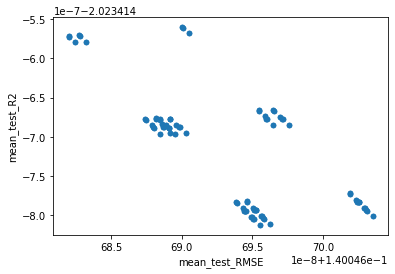

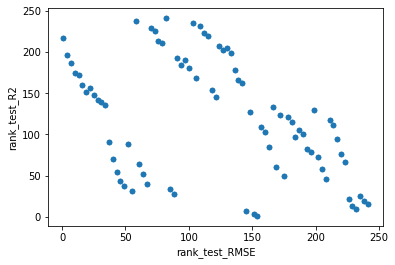

In [ ]:
df_results_bayes.plot(x='mean_test_RMSE',y='mean_test_R2',kind='scatter')
df_results_bayes.plot(x='rank_test_RMSE',y='rank_test_R2',kind='scatter')

In [ ]:
pipe = Pipeline([
                 ('model', MLPRegressor(max_iter=5000))
])

pipe.get_params()

In [ ]:
model_mlp = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__solver': ['adam','lbfgs'],
        'model__activation': ['relu', 'identity', 'logistic', 'tanh'],
        'model__hidden_layer_sizes': [10,11,12,13,14,15]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_mlp.fit(X,y)
df_results_mlp = pd.DataFrame(model_mlp.cv_results_)
df_results_mlp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.121507,0.041376,0.001676,0.000092,relu,10,adam,"{'model__activation': 'relu', 'model__hidden_l...",-10.488924,-5.665351,-0.264700,0.285941,-3.107021,-2.194788,-4.331205,0.355664,0.257107,-0.078984,-2.523226,3.347054,17,0.027877,0.051363,0.023396,0.098198,0.198491,0.174709,0.473152,0.417547,0.031645,0.063237,0.155961,0.156047,36
1,0.155881,0.090410,0.001869,0.000342,relu,10,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-0.605998,-1.104300,-1.086040,0.546292,-18.463458,-7.276771,-0.271344,0.381832,-33.683853,-1.739793,-6.330343,10.649090,32,0.003897,0.016216,0.038590,0.062394,0.940661,0.452621,0.112834,0.400590,1.477422,0.160574,0.366580,0.461879,17
2,0.117760,0.048078,0.001664,0.000069,relu,11,adam,"{'model__activation': 'relu', 'model__hidden_l...",-30.697589,-4.793756,-0.369699,0.553185,-13.045065,-2.151807,-1.820984,0.481494,-3.358599,0.459815,-5.474300,9.251640,31,0.076912,0.044647,0.025338,0.061446,0.678792,0.172359,0.250366,0.336006,0.185663,0.031659,0.186319,0.191495,24
3,0.162661,0.097306,0.001646,0.000065,relu,11,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-3.967019,-2.598826,0.364328,0.248933,-70.566325,-4.621770,-0.423137,0.436423,0.789355,-6.632870,-8.697091,20.765949,33,0.012052,0.027732,0.011759,0.103287,3.458770,0.307430,0.126305,0.365214,0.008973,0.447348,0.486887,1.002410,16
4,0.095682,0.033423,0.001669,0.000066,relu,12,adam,"{'model__activation': 'relu', 'model__hidden_l...",-9.311979,-4.133059,-0.624981,0.524962,-5.810507,-3.895835,-3.565774,0.544963,-3.045538,-2.223032,-3.154078,2.848643,20,0.025021,0.039555,0.030061,0.065327,0.329149,0.267732,0.405219,0.294876,0.172327,0.188896,0.181816,0.131659,25
5,0.206384,0.145899,0.001718,0.000083,relu,12,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",0.285663,-5.014513,0.217061,0.849435,-90.725555,-5.668676,-1.138074,0.323096,-164.802614,-3.824542,-26.949872,53.105770,39,0.001733,0.046348,0.014484,0.020706,4.433057,0.364681,0.189757,0.438653,7.062666,0.282757,1.285484,2.311984,10
6,0.116932,0.032621,0.001659,0.000043,relu,13,adam,"{'model__activation': 'relu', 'model__hidden_l...",-8.193678,-8.962776,0.006572,0.357034,-9.801333,-2.390780,-3.377438,0.141691,-0.795985,-0.710583,-3.372727,3.849545,22,0.022308,0.076773,0.018378,0.088421,0.522024,0.185427,0.388504,0.556208,0.076503,0.100254,0.203480,0.195858,21
7,0.269116,0.141418,0.001773,0.000235,relu,13,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",0.414895,0.185204,0.178775,0.830154,-187.537797,-4.480631,-0.970125,-4.470884,-1215.669821,-13.297989,-142.481822,361.971216,48,0.001420,0.006279,0.015192,0.023357,9.111951,0.299712,0.174851,3.545284,51.826281,0.837978,6.584231,15.326000,1
8,0.126315,0.037907,0.001708,0.000079,relu,14,adam,"{'model__activation': 'relu', 'model__hidden_l...",-7.071331,-1.484961,-0.125458,0.599518,-5.192199,-4.569079,-2.166949,0.363642,0.599488,-0.092964,-1.914029,2.626409,5,0.019584,0.019149,0.020820,0.055074,0.299266,0.304549,0.281071,0.412377,0.017061,0.064057,0.149301,0.147333,39
9,0.277057,0.082975,0.001720,0.000076,relu,14,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-1.133967,0.209704,-0.180650,0.823025,-61.366880,-1.692177,-0.070153,0.724870,-306.604125,-1.319472,-37.060982,91.675511,43,0.005178,0.006090,0.021841,0.024338,3.014165,0.147224,0.094978,0.178292,13.102962,0.135940,1.673101,3.909760,9


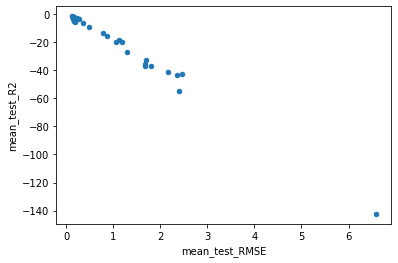

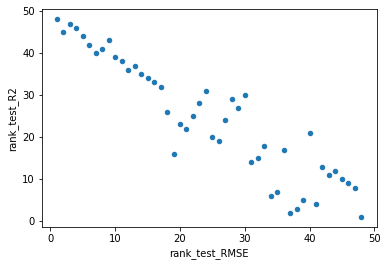

In [ ]:
df_results_mlp.plot(x='mean_test_RMSE',y='mean_test_R2',kind='scatter')
df_results_mlp.plot(x='rank_test_RMSE',y='rank_test_R2',kind='scatter')

In [ ]:
minvalue_rmse = df_results_mlp['mean_test_RMSE'].min()
df_results_mlp.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
20,0.090413,0.030162,0.001628,0.000094,identity,14,adam,"{'model__activation': 'identity', 'model__hidd...",-3.301685,-5.693461,-1.178716,0.615824,-1.084321,-2.013793,-1.715034,0.330467,0.72151,-0.408462,-1.372767,1.876417,1,0.010438,0.05158,0.040305,0.052832,0.100734,0.164811,0.240963,0.433876,0.011863,0.082547,0.118995,0.124965,48


Os menores valores para RMSE estão ocorrando para os melhores valores de R2 quando (refit = 'RMSE')

In [ ]:
minvalue_rmse = df_results_bayes['mean_test_RMSE'].min()
df_results_bayes.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
168,0.002175,0.000214,0.001315,0.000063,1e-07,1e-05,1e-05,1e-07,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241
169,0.002348,0.000329,0.001478,0.000242,1e-07,1e-05,1e-05,1e-07,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241
170,0.002233,0.000291,0.001350,0.000155,1e-07,1e-05,1e-05,1e-07,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241


In [ ]:
maxvalue_r2 = df_results_mlp['mean_test_R2'].max()
df_results_mlp.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
20,0.090413,0.030162,0.001628,0.000094,identity,14,adam,"{'model__activation': 'identity', 'model__hidd...",-3.301685,-5.693461,-1.178716,0.615824,-1.084321,-2.013793,-1.715034,0.330467,0.72151,-0.408462,-1.372767,1.876417,1,0.010438,0.05158,0.040305,0.052832,0.100734,0.164811,0.240963,0.433876,0.011863,0.082547,0.118995,0.124965,48


In [ ]:
maxvalue_r2 = df_results_bayes['mean_test_R2'].max()
df_results_bayes.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
162,0.002791,0.000665,0.001601,0.000366,1e-07,1e-05,1e-05,1e-05,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154
163,0.002206,0.000349,0.001338,0.000123,1e-07,1e-05,1e-05,1e-05,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154
164,0.002011,0.000064,0.001283,0.000026,1e-07,1e-05,1e-05,1e-05,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154


In [ ]:
model_mlp_opt = MLPRegressor(shuffle=True, solver='adam', hidden_layer_sizes=14, activation='identity', max_iter=5000).fit(x_train, y_train)
model_bayesian_opt = BayesianRidge(n_iter=100, alpha_1=1e-7,alpha_2=1e-5,lambda_1=1e-5,lambda_2=1e-5).fit(x_train, y_train)
predict_mlp_opt = model_mlp_opt.predict(x_test)
predict_bayesian_opt = model_bayesian_opt.predict(x_test)

model_results['V predict_mlp_opt'] = predict_mlp_opt
model_results['V predict_bayesian_opt'] = predict_bayesian_opt
model_results = pd.DataFrame(model_results)
model_results

,V real,V predict_bayesian,V predict_mlp,V predict_mlp_opt,V predict_bayesian_opt
0,-0.830143,-0.835439,-0.900628,-0.804402,-0.835439
1,-0.892602,-0.784803,-0.799094,-0.688040,-0.784803
2,-0.022064,-0.322209,-0.049037,-0.310614,-0.322209
3,0.578196,0.210178,0.346434,0.146219,0.210178
4,-0.814893,-0.720898,-0.631358,-0.678477,-0.720898
5,0.707982,0.241961,0.329327,0.054369,0.241962
6,-0.602206,-0.505004,-0.455063,-0.496775,-0.505004
7,-0.844419,-0.734711,-0.813319,-0.720498,-0.734711
8,-0.847339,-0.486027,-0.569376,-0.419615,-0.486026
9,-0.975178,-0.960069,-0.993634,-0.898353,-0.960069


In [ ]:
dados_retorno = {}
v_max = originais['V'].max()
v_min = originais['V'].min()

for col in model_results.columns:
    series = model_results[col]
    series_undo = undo_norm(series, v_min, v_max)
    dados_retorno[f'{col}'] = series_undo

model_results_undone = pd.DataFrame(dados_retorno)
model_results_undone

,V real,V predict_bayesian,V predict_mlp,V predict_mlp_opt,V predict_bayesian_opt
0,0.1119,0.108636,0.068453,0.127767,0.108635
1,0.0734,0.139847,0.131039,0.199492,0.139847
2,0.6100,0.424991,0.593374,0.432137,0.424990
3,0.9800,0.753153,0.837142,0.713729,0.753154
4,0.1213,0.179238,0.234431,0.205387,0.179238
5,1.0600,0.772745,0.826597,0.657113,0.772746
6,0.2524,0.312316,0.343099,0.317388,0.312316
7,0.1031,0.170724,0.122270,0.179485,0.170724
8,0.1013,0.324013,0.272637,0.364950,0.324013
9,0.0225,0.031813,0.011124,0.069856,0.031813


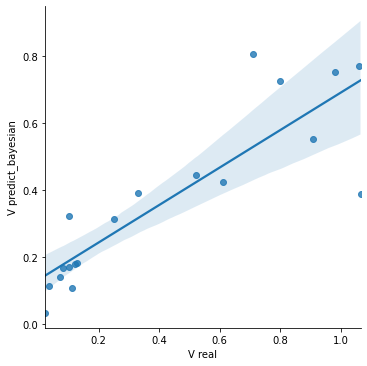

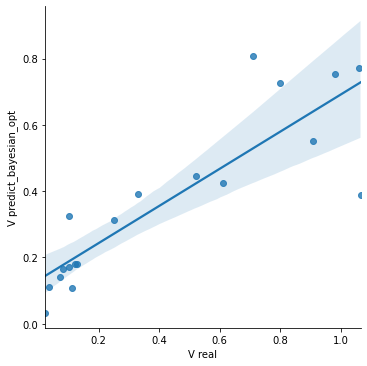

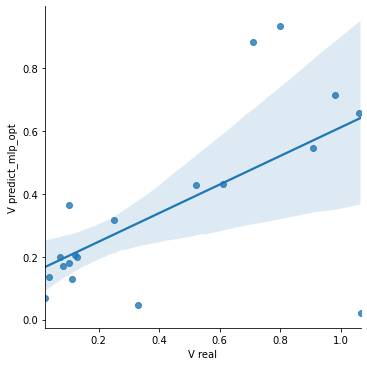

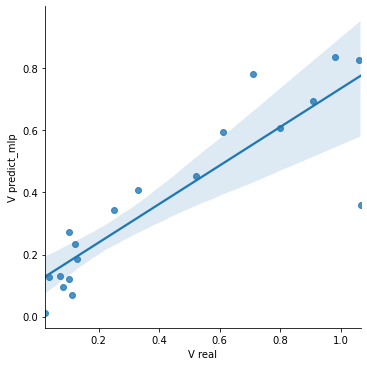

In [ ]:
sns.lmplot(x='V real', y='V predict_bayesian', data=model_results_undone)
sns.lmplot(x='V real', y='V predict_bayesian_opt', data=model_results_undone)
sns.lmplot(x='V real', y='V predict_mlp_opt', data=model_results_undone)
sns.lmplot(x='V real', y='V predict_mlp', data=model_results_undone)

In [ ]:
dados_quantil = QuantileTransformer(n_quantiles=100).fit_transform(originais)
dados_quantil = pd.DataFrame(dados_quantil, columns=originais.columns).drop(['Re','Cd'],axis=1)
dados_quantil

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (88). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,k,n,dp,ps,p,V
0,0.655172,0.643678,0.109195,0.057471,0.500000,0.011494
1,0.655172,0.643678,0.149425,0.586207,0.500000,0.091954
2,0.655172,0.643678,0.235632,0.149425,0.500000,0.114943
3,0.655172,0.643678,0.373563,0.488506,0.500000,0.183908
4,0.655172,0.643678,0.540230,0.459770,0.500000,0.218391
...,...,...,...,...,...,...
83,0.379310,0.816092,0.494253,0.413793,0.241379,0.241379
84,0.379310,0.816092,0.195402,0.540230,0.252874,0.149425
85,0.379310,0.816092,0.068966,0.097701,0.712644,0.022989
86,0.379310,0.816092,0.287356,1.000000,0.195402,0.609195


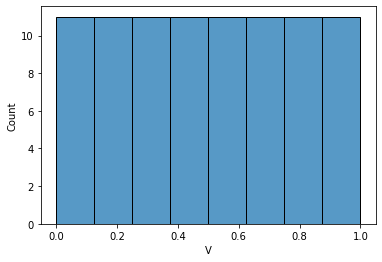

In [ ]:
sns.histplot(x='V',data=dados_quantil)

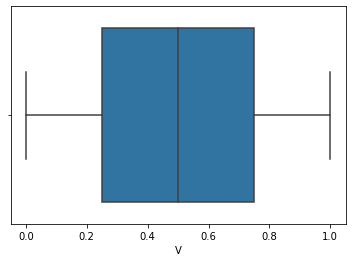

In [ ]:
sns.boxplot(x='V',data=dados_quantil)

In [ ]:
X = dados_quantil.drop('V',axis=1)
y = dados_quantil['V']

In [ ]:
pipe = Pipeline([
                 ('model', MLPRegressor(max_iter=5000))
])

model_mlp = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__solver': ['adam','lbfgs'],
        'model__activation': ['relu', 'identity', 'logistic', 'tanh'],
        'model__hidden_layer_sizes': [10,11,12,13,14,15]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_mlp.fit(X,y)
df_results_mlp = pd.DataFrame(model_mlp.cv_results_)
df_results_mlp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.115784,0.073528,0.003268,0.001138,relu,10,adam,"{'model__activation': 'relu', 'model__hidden_l...",-10.617653,-3.234532,-9.638118,0.283730,-0.102291,-0.446162,-18.325574,0.256457,0.260752,0.813301,-4.075009,6.220490,34,0.104714,0.067397,0.086550,0.070170,0.037512,0.009505,0.041104,0.108156,0.027480,0.012574,0.056516,0.034321,18
1,0.161514,0.057744,0.002843,0.000539,relu,10,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-2.304957,0.027423,-1.841289,0.755979,-0.542620,-5.951707,-6.724570,0.742693,0.315722,0.743961,-1.477937,2.637694,14,0.029789,0.015480,0.023116,0.023906,0.052497,0.045690,0.016430,0.037428,0.025436,0.017243,0.028701,0.012057,38
2,0.145326,0.054071,0.002604,0.000243,relu,11,adam,"{'model__activation': 'relu', 'model__hidden_l...",-5.936690,-3.311714,-10.322508,-0.630832,-0.591618,-2.192505,-24.468107,-0.688636,-0.054225,0.781344,-4.741549,7.302561,37,0.062523,0.068626,0.092118,0.159766,0.054164,0.020983,0.054169,0.245629,0.039188,0.014726,0.081189,0.067162,7
3,0.190511,0.089217,0.003968,0.002051,relu,11,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-0.578546,-0.032705,-3.310850,0.470584,-2.985615,-1.449998,-5.584611,0.863457,0.302908,0.873627,-1.143175,2.055609,3,0.014228,0.016437,0.035072,0.051865,0.135634,0.016103,0.014005,0.019862,0.025913,0.008511,0.033763,0.036033,36
4,0.126914,0.056951,0.002751,0.000306,relu,12,adam,"{'model__activation': 'relu', 'model__hidden_l...",-5.250592,-0.883296,-4.202807,0.835060,-0.218741,-0.519490,-3.416237,-0.010318,-1.035297,0.393676,-1.430804,1.986282,13,0.056339,0.029975,0.042329,0.016159,0.041475,0.009987,0.009393,0.146961,0.075657,0.040834,0.046911,0.038751,25
5,0.169537,0.085692,0.002620,0.000132,relu,12,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-0.891027,-0.997939,-0.049984,0.607258,-0.565338,-1.545085,-5.493812,0.735863,0.626617,0.965001,-0.660845,1.804111,1,0.017045,0.031799,0.008543,0.038475,0.053270,0.016727,0.013812,0.038421,0.013880,0.002357,0.023433,0.015319,41
6,0.123427,0.040618,0.002672,0.000256,relu,13,adam,"{'model__activation': 'relu', 'model__hidden_l...",-5.361106,-0.198035,-2.260425,0.871080,0.335136,-6.829411,-17.636405,0.329890,-0.220566,0.661170,-3.030867,5.487969,26,0.057335,0.019068,0.026526,0.012630,0.022626,0.051458,0.039638,0.097474,0.045372,0.022819,0.039495,0.023932,31
7,0.222425,0.120367,0.002784,0.000404,relu,13,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-0.429875,0.873041,-2.170520,0.757654,-1.372051,-0.611508,-8.931448,0.913958,0.370142,0.822378,-0.977823,2.834549,2,0.012888,0.002021,0.025795,0.023742,0.080723,0.010592,0.021124,0.012516,0.023413,0.011962,0.022477,0.020662,42
8,0.132171,0.054388,0.002743,0.000472,relu,14,adam,"{'model__activation': 'relu', 'model__hidden_l...",-0.890594,-1.707917,-1.226555,0.040864,-1.042941,0.109565,-48.789460,0.501881,0.199993,0.438511,-5.236665,14.536110,40,0.017041,0.043100,0.018115,0.093963,0.069523,0.005852,0.105899,0.072456,0.029738,0.037815,0.049350,0.032553,21
9,0.288579,0.128672,0.002588,0.000082,relu,14,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-0.728507,-1.637564,-2.046971,0.929891,-0.991138,-6.118111,-10.784651,0.749471,0.574185,0.786531,-1.926686,3.569009,20,0.015580,0.041980,0.024790,0.006868,0.067760,0.046783,0.025065,0.036442,0.015829,0.014377,0.029547,0.017692,37


In [ ]:
minvalue_rmse = df_results_mlp['mean_test_RMSE'].min()
df_results_mlp.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
13,0.013723,0.001776,0.002554,0.000162,identity,10,lbfgs,"{'model__activation': 'identity', 'model__hidd...",-0.359936,-0.077963,0.226798,0.833725,-0.297267,-0.357912,-14.884388,0.747692,0.770547,0.850333,-1.254837,4.569172,9,0.012258,0.017157,0.006291,0.016289,0.044147,0.008925,0.033785,0.036701,0.008529,0.01008,0.019416,0.012927,48


In [ ]:
maxvalue_r2 = df_results_mlp['mean_test_R2'].max()
df_results_mlp.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
5,0.169537,0.085692,0.00262,0.000132,relu,12,lbfgs,"{'model__activation': 'relu', 'model__hidden_l...",-0.891027,-0.997939,-0.049984,0.607258,-0.565338,-1.545085,-5.493812,0.735863,0.626617,0.965001,-0.660845,1.804111,1,0.017045,0.031799,0.008543,0.038475,0.05327,0.016727,0.013812,0.038421,0.01388,0.002357,0.023433,0.015319,41


In [ ]:
pipe = Pipeline([
                 ('model', BayesianRidge())
])

model_bayes = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__n_iter': [100,500,1000],
        'model__alpha_1': [1e-5,1e-6,1e-7],
        'model__alpha_2': [1e-5,1e-6,1e-7],
        'model__lambda_1': [1e-5,1e-6,1e-7],
        'model__lambda_2': [1e-5,1e-6,1e-7]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_bayes.fit(X,y)
df_results_bayes = pd.DataFrame(model_bayes.cv_results_)
df_results_bayes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.003405,0.000518,0.003198,0.003637,1e-05,1e-05,1e-05,1e-05,100,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276005,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468800,0.745165,0.77133,0.849659,-1.296465,4.747519,154,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,181
1,0.003768,0.000788,0.004331,0.003700,1e-05,1e-05,1e-05,1e-05,500,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276005,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468800,0.745165,0.77133,0.849659,-1.296465,4.747519,154,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,181
2,0.004617,0.002519,0.003674,0.003363,1e-05,1e-05,1e-05,1e-05,1000,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276005,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468800,0.745165,0.77133,0.849659,-1.296465,4.747519,154,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,181
3,0.003243,0.000289,0.003957,0.003311,1e-05,1e-05,1e-05,1e-06,100,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276004,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468810,0.745165,0.77133,0.849659,-1.296466,4.747523,226,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,46
4,0.003966,0.002175,0.002683,0.002124,1e-05,1e-05,1e-05,1e-06,500,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276004,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468810,0.745165,0.77133,0.849659,-1.296466,4.747523,226,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.003064,0.000133,0.001991,0.000127,1e-07,1e-07,1e-07,1e-06,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-0.276005,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468796,0.745165,0.77133,0.849659,-1.296465,4.747518,61,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,115
239,0.003031,0.000112,0.001981,0.000109,1e-07,1e-07,1e-07,1e-06,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-0.276005,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468796,0.745165,0.77133,0.849659,-1.296465,4.747518,61,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,115
240,0.003108,0.000223,0.002024,0.000110,1e-07,1e-07,1e-07,1e-07,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-0.276005,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468797,0.745165,0.77133,0.849659,-1.296465,4.747519,100,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,79
241,0.002964,0.000061,0.001929,0.000042,1e-07,1e-07,1e-07,1e-07,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-0.276005,-0.062594,0.257704,0.838219,-0.289541,-0.329787,-15.468797,0.745165,0.77133,0.849659,-1.296465,4.747519,100,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,79


In [ ]:
minvalue_rmse = df_results_bayes['mean_test_RMSE'].min()
df_results_bayes.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
216,0.003098,0.000083,0.002057,0.000051,1e-07,1e-07,1e-05,1e-05,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-0.276006,-0.062595,0.257704,0.838219,-0.289541,-0.329788,-15.468789,0.745165,0.77133,0.849659,-1.296464,4.747516,43,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,241
217,0.003905,0.002015,0.004258,0.003158,1e-07,1e-07,1e-05,1e-05,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-0.276006,-0.062595,0.257704,0.838219,-0.289541,-0.329788,-15.468789,0.745165,0.77133,0.849659,-1.296464,4.747516,43,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,241
218,0.003209,0.000150,0.002188,0.000165,1e-07,1e-07,1e-05,1e-05,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-0.276006,-0.062595,0.257704,0.838219,-0.289541,-0.329788,-15.468789,0.745165,0.77133,0.849659,-1.296464,4.747516,43,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,241


In [ ]:
maxvalue_r2 = df_results_bayes['mean_test_R2'].max()
df_results_bayes.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
72,0.003070,0.000123,0.001920,0.000024,1e-05,1e-07,1e-07,1e-05,100,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276006,-0.062595,0.257704,0.838219,-0.289541,-0.329788,-15.468786,0.745165,0.77133,0.849659,-1.296464,4.747515,1,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,208
73,0.003539,0.001140,0.003685,0.003119,1e-05,1e-07,1e-07,1e-05,500,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276006,-0.062595,0.257704,0.838219,-0.289541,-0.329788,-15.468786,0.745165,0.77133,0.849659,-1.296464,4.747515,1,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,208
74,0.003024,0.000110,0.001982,0.000088,1e-05,1e-07,1e-07,1e-05,1000,"{'model__alpha_1': 1e-05, 'model__alpha_2': 1e...",-0.276006,-0.062595,0.257704,0.838219,-0.289541,-0.329788,-15.468786,0.745165,0.77133,0.849659,-1.296464,4.747515,1,0.011501,0.016912,0.006039,0.015849,0.043884,0.00874,0.035028,0.037068,0.0085,0.010125,0.019365,0.013168,208


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=69, shuffle=True)
split_data = {'x_train':x_train, 'y_train':y_train, 'x_test':x_test, 'y_test':y_test}
test_data = pd.concat([x_test,y_test], axis=1)
test_data

,k,n,dp,ps,p,V
59,0.764368,0.229885,0.867816,0.821839,0.500000,0.942529
5,0.195402,0.758621,0.109195,0.057471,0.500000,0.137931
41,1.000000,0.057471,0.758621,0.747126,0.500000,0.471264
2,0.655172,0.643678,0.235632,0.149425,0.500000,0.114943
86,0.379310,0.816092,0.287356,1.000000,0.195402,0.609195
54,0.764368,0.229885,0.758621,0.747126,0.500000,0.850575
51,0.735632,0.270115,0.867816,0.821839,0.844828,0.798851
40,0.856322,0.189655,0.614943,0.931034,0.764368,0.344828
32,0.287356,0.488506,0.000000,0.178161,0.500000,0.057471
25,0.327586,0.390805,0.614943,0.287356,0.500000,0.689655


In [ ]:
model_mlp_opt_quantil = MLPRegressor(shuffle=True, solver='lbfgs', hidden_layer_sizes=14, activation='identity', max_iter=5000).fit(x_train, y_train)
predict_mlp_opt_quantil = model_mlp_opt.predict(x_test)

model_results_quantil = pd.DataFrame({'V real': y_test, 'V predict': predict_mlp_opt_quantil})
model_results_quantil

,V real,V predict
59,0.942529,0.496953
5,0.137931,0.020812
41,0.471264,0.507103
2,0.114943,0.166493
86,0.609195,-0.005921
54,0.850575,0.447868
51,0.798851,0.554498
40,0.344828,0.430156
32,0.057471,0.001978
25,0.689655,0.323594


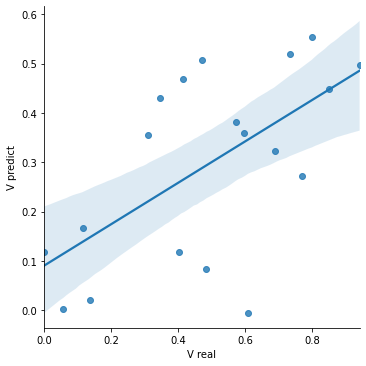

In [ ]:
sns.lmplot(x='V real',y='V predict', data=model_results_quantil)